## Titanic - Machine Learning from Disaster
**Challenge link**  
https://www.kaggle.com/c/titanic/


**Contents**
1. 문제 정의하기
2. 데이터 불러오기
3. 데이터 분석
4. 데이터 전처리 및 특성 추출
5. 모델 설계 및 학습
6. 마무리  

**Reference**  
https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html  
https://github.com/cyc1am3n/kaggle_study/blob/master/01_titanic/01_titanic.ipynb  

***

### 1. 문제 정의하기
**타이타닉호 침몰 사고**  
타이타닉호는 1912년 4월 14일 영국에서 미국으로 가는 첫 항해에서 표류하는 빙하에 부닥쳐 1517명의 사망자를 내고 침몰했다.  
구명보트가 부족해 생존자는 706명에 그쳤다.  

**Titanic Challenge**  
타이타닉 호에서 탑승했던 사람들의 정보를 바탕으로 생존자를 예측하는 문제  
이 문제를 풀기 위해서, 여러 가지 머신러닝 스킬들을 사용  

***

### 2. 데이터 불러오기  
(1) 필요한 라이브러리인 numpy와 pandas를 import  
(2) 데이터(train.csv, test.csv) 파일을 코드와 같은 디렉토리에 다운을 받는다.  
(3) pd.read_csv 를 이용해서 불러온다.

In [139]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [140]:
#불러온 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. 데이터 분석
- 데이터 분석 전 캐글에서 제공되는 Data Dictionary 확인하기.  
- SipSp나 Parch같이 변수명의 의미을 바로 알 수가 없을 때
- Categorical feature의 변수값의 의미를 얻을 때 도움이 된다.

**Survivied**는 생존 여부(0은 사망, 1은 생존. train 데이터에서만 제공)  
**Pclass**는 사회경제적 지위(1에 가까울 수록 높음)  
**SipSp**는 배우자나 형제 자매 명 수의 총 합  
**Parch**는 부모 자식 명 수의 총 합  

In [141]:
# 데이터의 형태 파악하기
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):


In [142]:
# 데이터의 분포 확인하기
import matplotlib.pyplot as plt
%matplotlib inline #output을 inline 형태로 바로 브라우저에서 띄워주는 옵션
import seaborn as sns
sns.set() # setting seaborn default for plots

UsageError: unrecognized arguments: #output을 inline 형태로 바로 브라우저에서 띄워주는 옵션


**seaborn**  
matplotlib와 같은 시각화 라이브러리  
1. seaborn에서만 제공되는 통계 기반 plot
2. 특별하게 꾸미지 않아도 깔끔하게 구현되는 기본 color
3. 더 아름답게 그래프 구현이 가능한 palette 기능
4. pandas 데이터프레임과 높은 호환성

***

### 3-1. Pie chart for Categorical Feature
카테고리형 데이터의 분포 확인을 위한 원형 그래프 그리기

In [143]:
#원형 그래프 출력 함수
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

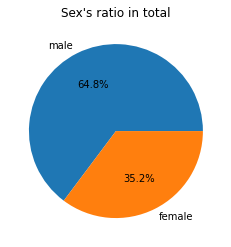

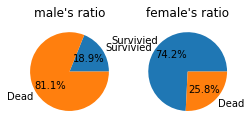

In [144]:
pie_chart('Sex')
#남성이 여성보다 많이 탔으며, 남성보다 여성의 생존 비율이 높다.

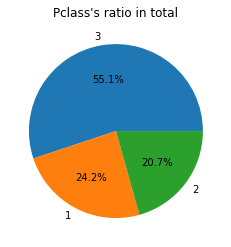

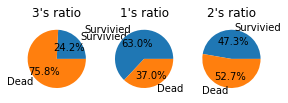

In [145]:
pie_chart('Pclass')
# Pclass가 3인 사람들의 수가 가장 많다
# Pclass가 높을수록(숫자가 작을수록,사회경제적 지위가 높을수록) 생존 비율이 높다는 것을 알 수 있다.

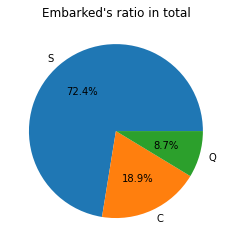

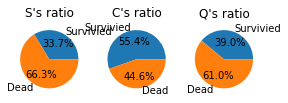

In [146]:
pie_chart('Embarked')
# Southampton에서 선착한 사람이 가장 많았다.
# Cherbourg에서 탄 사람 중에서는 생존한 사람의 비율이 높았다
# 나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많았다.

### 3-2. Bar chart for Categorical feature
SibSp ( # of siblings and spouse)  
Parch ( # of parents and children)

In [147]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

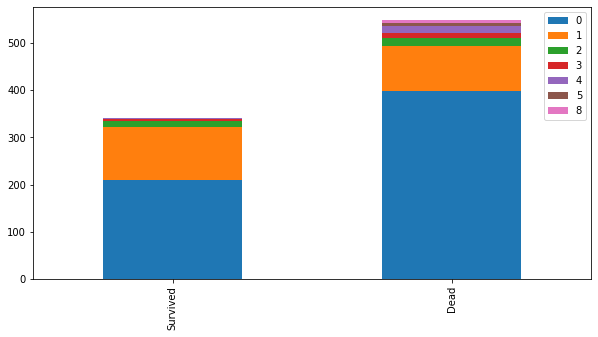

In [148]:
# 형재와 배우자 수에 따른 결과 출력
bar_chart("SibSp")
# 2명 이상의 형제나 배우자와 함께 배에 탔을 경우 생존한 사람의 비율이 크다.
# 그렇지 않을 경우에는 생존한 사람의 비율이 적었다는 것을 볼 수 있다.

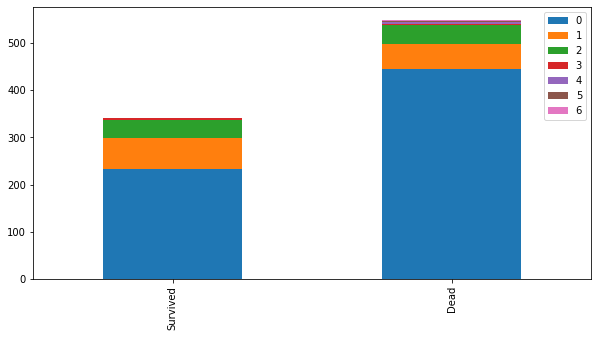

In [149]:
bar_chart("Parch")
# Parch특성은 SibSp와 비슷하게 2명 이상의 부모나 자식과 함께 배에 탔을 때는 조금 더 생존
# 그렇지 않을 경우에는 생존한 사람의 비율이 적었다.

**데이터를 살펴본 결과**  
성별이 여성일 수록(영화 타이타닉에서 나온 것 처럼 여성과 아이부터 먼저 살렸기 때문이 아닐까 싶고),  
Pclass가 높을 수록(맨 위의 사진을 보면 타이타닉 호는 배의 후미부터 잠기기 시작되었다는 것을 알 수 있는데, 티켓의 등급이 높아질 수록 숙소가 배의 앞쪽과 위쪽으로 가는 경향이 있어 그 영향이 아닐까 싶고),  
Cherbourg 선착장에서 배를 탔다면,  
형제, 자매, 배우자, 부모, 자녀와 함께 배에 탔다면,  
생존 확률이 더 높았다는 것을 볼 수 있다.  

하지만 하나의 특성과 생존 비율 만을 생각해서 예측하기에는 무리가 있다.  

예를 들어 높은 금액의 티켓(살 확률이 높은 숙소를 가진)을 산 부유한 사람이 가족들이랑 왔을 경우가 많다고 가정해본다면,
가족들과 함께 왔다고 해서 살 가능성이 높다고 할 수는 없으므로 단일 특성을 가지고 생존 확률을 예측하기보단 여러가지 특성을 종합해서 예측을 하는 것이 더 좋을 것이다.

### 4. 데이터 전처리 및 특성 추출
- 모델에게 학습을 시킬 특성들을 골라서 학습하기에 알맞게 전처리 과정을 진행 해볼 것이다.  
- 선택할 특성은 Name, Sex, Embarked, Age, SibSp, Parch, Fare, Pclass
- Ticket과 Cabin에 대한 의미는 아직 찾지 못했으므로 데이터 세트에서 제외한다.

In [150]:
train_and_test = [train, test]
train_and_test

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [151]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [152]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [153]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')

train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [154]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [155]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

In [156]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [157]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [158]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [159]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( {0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,7.2500,NaN,S,Mr,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle,1,0,PC 17599,71.2833,C85,C,Mrs,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,53.1000,C123,S,Mrs,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,8.0500,NaN,S,Mr,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Young,0,0,211536,13.0000,NaN,S,Other,"(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,Young,0,0,112053,30.0000,B42,S,Miss,"(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss,"(16.0, 32.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,Young,0,0,111369,30.0000,C148,C,Mr,"(16.0, 32.0]"


In [160]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [161]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675)

In [162]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)


In [163]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

In [164]:
features_drop = ['Name','Ticket','Cabin','SibSp','Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId','AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [165]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

print(train.head())
print(test.head())


   Survived  Pclass  Fare  Family  Sex_female  Sex_male  Age_Child  \
0         0       3     0       1           0         1          0   
1         1       1     4       1           1         0          0   
2         1       3     1       0           1         0          0   
3         1       1     4       1           1         0          0   
4         0       3     1       0           0         1          0   

   Age_Middle  Age_Old  Age_Prime  Age_Young  Embarked_C  Embarked_Q  \
0           0        0          0          1           0           0   
1           1        0          0          0           1           0   
2           0        0          0          1           0           0   
3           1        0          0          0           0           0   
4           1        0          0          0           0           0   

   Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Other  
0           1             0           0         1          0          

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [168]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [169]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction